# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: December 3, 2022
* Student Name: Katherine Sejas
* Student Net ID: sws2vn
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

In [1]:
!python "/Users/kys/Downloads/DS5100/Project/montecarlosimulator/montecarlo/montecarlo.py"

In [17]:
!python "/Users/kys/Downloads/DS5100/Project/montecarlosimulator/montecarlo_tests.py"

Welcome to my module called montecarlo.
test_change_weight_of_a_single_side (__main__.DieTestSuite) ... ok
test_roll_die (__main__.DieTestSuite) ... ok
test_view_faces_weights (__main__.DieTestSuite) ... ok
test_play (__main__.GameTestSuite) ...      w  faces
0  1.0      1
1  1.0      2
2  1.0      3
3  1.0      4
4  1.0      5
5  1.0      6
[<montecarlo.montecarlo.Die object at 0x7fe7c131c160>, <montecarlo.montecarlo.Die object at 0x7fe7c131c160>]
ERROR
test_result_of_recent_play (__main__.GameTestSuite) ... [<montecarlo.montecarlo.Die object at 0x7fe7c0340040>, <montecarlo.montecarlo.Die object at 0x7fe7c0340040>]
ERROR

ERROR: test_play (__main__.GameTestSuite)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/kys/Downloads/DS5100/Project/montecarlosimulator/montecarlo_tests.py", line 49, in test_play
    Game1.play(5)
  File "/Users/kys/Downloads/DS5100/Project/montecarlosimulator/montecarlo/montecarlo.py", line

# The Monte Carlo Module

# Test Module

# Test Results

# Scenario 1: 2-Headed Coin
1. Create one fair coin (with faces H and T) and one unfair coin. For the unfair coin, give one of the faces a weight of 5 and the others 1. 

In [21]:
import pandas as pd
import numpy as np


In [22]:
from montecarlo import *
faces_array = np.array(['H', 'T'], dtype = str)
fair_coin = Die(faces_array)
fair_coin.view_faces_weights()

,w,faces
0,1.0,H
1,1.0,T


In [23]:
unfair_coin = Die(faces_array)
unfair_coin.change_weight_of_a_single_side('H', 5)
unfair_coin.view_faces_weights()

,w,faces
0,5.0,H
1,1.0,T


2. Play a game of 1000 flips of three coins with all fair dice. 

In [24]:
three_fair_coins = []
faces_array = np.array(['H', 'T'], dtype = str)
for i in range(0,3):
    fair_coin = Die(faces_array)
    three_fair_coins.append(fair_coin)
game_with_three_fair_coins = Game(three_fair_coins)
game_with_three_fair_coins.play(1000)
game_with_three_fair_coins.result_of_recent_play('wide')


,0,1,2
roll_num_index,,,
0,H,H,T
1,T,H,H
2,H,H,T
3,H,H,T
4,T,H,H
...,...,...,...
995,T,H,H
996,H,T,H
997,H,H,H


3. Play a game of 1000 flips with two unfair dice and one fair die. 

In [25]:
three_coins_with_two_unfair = []

three_coins_with_two_unfair.append(fair_coin)
three_coins_with_two_unfair.append(unfair_coin)
three_coins_with_two_unfair.append(unfair_coin)

game_with_three_coins = Game(three_coins_with_two_unfair)
game_with_three_coins.play(1000)
game_with_three_coins.result_of_recent_play('wide')

,0,1,2
roll_num_index,,,
0,H,H,T
1,T,H,H
2,T,H,H
3,H,H,H
4,T,H,H
...,...,...,...
995,T,H,T
996,T,H,T
997,H,H,H


4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts. 
5. Compute relative frequency as the number of jackpots over the total number of rolls. 

Fair Game

In [26]:

fair_game = Analyzer(game_with_three_fair_coins.result_of_play)
fair_game.face_counts_per_roll()

fair_game.jackpot()
relative_freq_jackpot_fair = 100*(fair_game.number_of_jackpots/1000)
relative_freq_no_jackpot_fair = 100-relative_freq_jackpot_fair

print(relative_freq_jackpot_fair)


24.3


Unfair Game

In [27]:
unfair_game = Analyzer(game_with_three_coins.result_of_play)
unfair_game.face_counts_per_roll()

unfair_game.jackpot()
relative_freq_jackpot_unfair = 100*(unfair_game.number_of_jackpots/1000)
relative_freq_no_jackpot_unfair = 100-relative_freq_jackpot_unfair

print(relative_freq_jackpot_unfair)

37.2


6. Show your results, comparing the two relative frequencies, in a simple bar chart. 

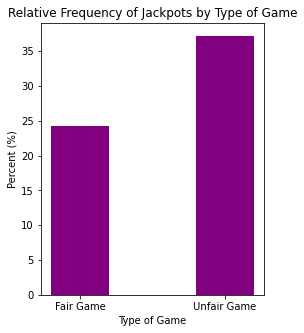

In [28]:
import matplotlib.pyplot as plt

jackpot_data_for_graph = {'Fair Game':relative_freq_jackpot_fair, 'Unfair Game':relative_freq_jackpot_unfair}
type_of_game = list(jackpot_data_for_graph.keys())
values = list(jackpot_data_for_graph.values())

fig = plt.figure(figsize = (4,5))
plt.bar(type_of_game, values, color="purple", width = 0.4)
plt.xlabel("Type of Game")
plt.ylabel("Percent (%)")
plt.title("Relative Frequency of Jackpots by Type of Game")
plt.show()

# Scenario 2: 6-sided die
7. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others. 

In [29]:

# Fair Die
faces_array = np.array([1,2,3,4,5,6], dtype = int)
fair_die = Die(faces_array)
fair_die.view_faces_weights()

,w,faces
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
5,1.0,6


In [30]:
# Unfair Die Type 1
unfair_die_type1 = Die(faces_array)
unfair_die_type1.change_weight_of_a_single_side(6, 5)
unfair_die_type1.view_faces_weights()

,w,faces
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
5,5.0,6


In [31]:
# Unfair Die Type 2
unfair_die_type2 = Die(faces_array)
unfair_die_type2.change_weight_of_a_single_side(1, 5)
unfair_die_type2.view_faces_weights()

,w,faces
0,5.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
5,1.0,6


8. Play a game of 10000 rolls with 5 fair dice. 

In [32]:

five_fair_dice = []

for i in range(0,5):
    five_fair_dice.append(fair_die)
game_with_five_fair_dice = Game(five_fair_dice)
game_with_five_fair_dice.play(10000)
game_with_five_fair_dice.result_of_recent_play('wide')

,0,1,2,3,4
roll_num_index,,,,,
0,2.0,4.0,2.0,2.0,4.0
1,3.0,6.0,4.0,6.0,2.0
2,3.0,3.0,6.0,4.0,2.0
3,1.0,4.0,5.0,1.0,6.0
4,4.0,5.0,5.0,1.0,3.0
...,...,...,...,...,...
9995,4.0,2.0,1.0,3.0,6.0
9996,5.0,6.0,5.0,4.0,3.0
9997,4.0,1.0,3.0,4.0,4.0


9. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice. 

In [33]:
two_unfair_type1_one_unfair_type2_two_fair_dice = []

two_unfair_type1_one_unfair_type2_two_fair_dice.append(fair_die)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(fair_die)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(unfair_die_type1)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(unfair_die_type1)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(unfair_die_type2)

game_with_five_dice = Game(two_unfair_type1_one_unfair_type2_two_fair_dice)
game_with_five_dice.play(10000)
game_with_five_dice.result_of_recent_play('wide')

,0,1,2,3,4
roll_num_index,,,,,
0,5.0,1.0,6.0,2.0,3.0
1,4.0,6.0,6.0,3.0,1.0
2,2.0,3.0,2.0,5.0,1.0
3,3.0,2.0,6.0,6.0,1.0
4,1.0,3.0,3.0,6.0,1.0
...,...,...,...,...,...
9995,5.0,6.0,6.0,1.0,3.0
9996,2.0,3.0,2.0,1.0,1.0
9997,1.0,2.0,4.0,2.0,1.0


10. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart. 

Fair Game

In [34]:
fair_game_dice = Analyzer(game_with_five_fair_dice.result_of_play)
fair_game_dice.face_counts_per_roll()

fair_game_dice.jackpot()
relative_freq_jackpot_fair_dice = 100*(fair_game_dice.number_of_jackpots/1000)
relative_freq_no_jackpot_fair_dice = 100-relative_freq_jackpot_fair_dice

print(relative_freq_jackpot_fair_dice)

0.2


Unfair Game

In [35]:
unfair_game_dice = Analyzer(game_with_five_dice.result_of_play)
unfair_game_dice.face_counts_per_roll()

unfair_game_dice.jackpot()
relative_freq_jackpot_unfair_dice = 100*(unfair_game_dice.number_of_jackpots/1000)
relative_freq_no_jackpot_unfair_dice = 100-relative_freq_jackpot_unfair_dice

print(relative_freq_jackpot_unfair_dice)

0.5


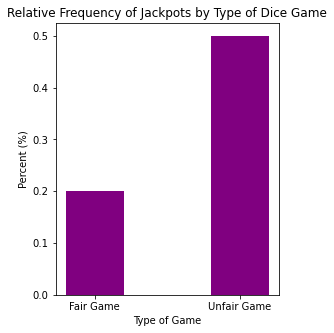

In [36]:
jackpot_dice_data_for_graph = {'Fair Game':relative_freq_jackpot_fair_dice, 'Unfair Game':relative_freq_jackpot_unfair_dice}
type_of_game_dice = list(jackpot_dice_data_for_graph.keys())
values = list(jackpot_dice_data_for_graph.values())

fig = plt.figure(figsize = (4,5))
plt.bar(type_of_game_dice, values, color="purple", width = 0.4)
plt.xlabel("Type of Game")
plt.ylabel("Percent (%)")
plt.title("Relative Frequency of Jackpots by Type of Dice Game")
plt.show()

11. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

Fair Game

In [37]:
fair_game_dice.combo()
fair_game_dice_top_10_combinations=fair_game_dice.faces_with_counts_combos.sort_values(by='Count', ascending=False).iloc[0:10,:]
fair_game_dice_top_10_combinations.reset_index(drop=False, inplace=True)
fair_game_dice_top_10_combinations

,1.0,2.0,3.0,4.0,5.0,6.0,Count
0,0.0,1.0,1.0,1.0,1.0,1.0,173
1,1.0,1.0,1.0,1.0,1.0,0.0,172
2,1.0,1.0,1.0,1.0,0.0,1.0,166
3,1.0,0.0,1.0,1.0,1.0,1.0,162
4,1.0,1.0,1.0,0.0,1.0,1.0,158
5,1.0,1.0,0.0,1.0,1.0,1.0,147
6,1.0,1.0,0.0,1.0,0.0,2.0,98
7,1.0,0.0,1.0,0.0,1.0,2.0,94
8,1.0,1.0,2.0,1.0,0.0,0.0,93
9,1.0,0.0,2.0,0.0,1.0,1.0,92


In [38]:
column_names = list(fair_game_dice_top_10_combinations.columns[0:6])
fair_game_dice_top_10_combinations.loc[:,'Combo'] = ""
for row in range(len(fair_game_dice_top_10_combinations)):
    for column in column_names:
        number_of_times_rolled = int(fair_game_dice_top_10_combinations.loc[row,column])
        fair_game_dice_top_10_combinations.loc[row,"Combo"] += str(int(column))*number_of_times_rolled
fair_game_dice_top_10_combinations

type_of_game_dice = list(fair_game_dice_top_10_combinations.loc[:,"Combo"])
values = list(fair_game_dice_top_10_combinations.loc[:,"Count"])

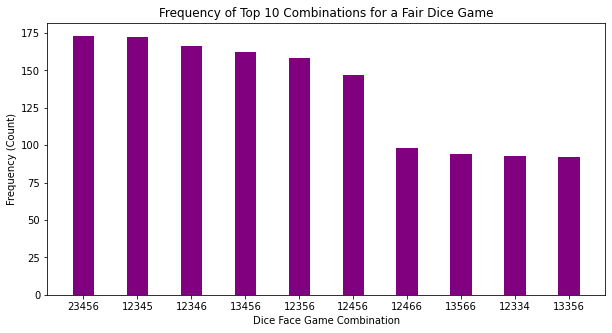

In [39]:
fig = plt.figure(figsize = (10,5))
plt.bar(type_of_game_dice, values, color="purple", width = 0.4)
plt.xlabel("Dice Face Game Combination")
plt.ylabel("Frequency (Count)")
plt.title("Frequency of Top 10 Combinations for a Fair Dice Game")
plt.show()

Unfair Game

In [40]:
unfair_game_dice.combo()
unfair_game_dice_top_10_combinations=unfair_game_dice.faces_with_counts_combos.sort_values(by='Count', ascending=False).iloc[0:10,:]
unfair_game_dice_top_10_combinations.reset_index(drop=False, inplace=True)
unfair_game_dice_top_10_combinations

,1.0,2.0,3.0,4.0,5.0,6.0,Count
0,1.0,1.0,1.0,0.0,0.0,2.0,220
1,1.0,0.0,1.0,0.0,1.0,2.0,213
2,1.0,0.0,1.0,1.0,0.0,2.0,203
3,1.0,1.0,0.0,1.0,0.0,2.0,193
4,1.0,1.0,0.0,0.0,1.0,2.0,183
5,1.0,1.0,1.0,1.0,0.0,1.0,181
6,1.0,0.0,0.0,1.0,1.0,2.0,180
7,1.0,1.0,1.0,0.0,1.0,1.0,178
8,2.0,1.0,0.0,0.0,0.0,2.0,165
9,2.0,0.0,0.0,0.0,1.0,2.0,145


In [41]:
column_names_unfair = list(unfair_game_dice_top_10_combinations.columns[0:6])
unfair_game_dice_top_10_combinations.loc[:,'Combo'] = ""
for row in range(len(unfair_game_dice_top_10_combinations)):
    for column in column_names_unfair:
        number_of_times_rolled = int(unfair_game_dice_top_10_combinations.loc[row,column])
        unfair_game_dice_top_10_combinations.loc[row,"Combo"] += str(int(column))*number_of_times_rolled
unfair_game_dice_top_10_combinations

type_of_game_unfair_dice = list(unfair_game_dice_top_10_combinations.loc[:,"Combo"])
values_unfair = list(unfair_game_dice_top_10_combinations.loc[:,"Count"])

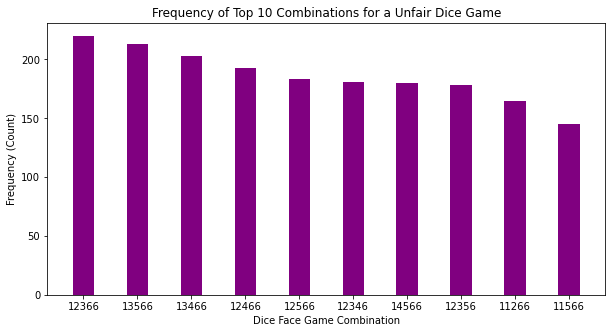

In [42]:
fig = plt.figure(figsize = (10,5))
plt.bar(type_of_game_unfair_dice, values_unfair, color="purple", width = 0.4)
plt.xlabel("Dice Face Game Combination")
plt.ylabel("Frequency (Count)")
plt.title("Frequency of Top 10 Combinations for a Unfair Dice Game")
plt.show()

# Scenario 3: Roman Alphabet
12. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights. 

Read in Frequency of Letters File

In [45]:
import pandas as pd
letter_with_weights = pd.read_csv('Frequency of Letters - Freq.csv')
letter_with_weights


,letter,weight
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


Create Die before Changing the Weights

In [46]:

letters_array = pd.Series(letter_with_weights['letter'].values)
dice_of_letters = Die(letters_array)
dice_of_letters.view_faces_weights()

,w,faces
0,1.0,A
1,1.0,B
2,1.0,C
3,1.0,D
4,1.0,E
5,1.0,F
6,1.0,G
7,1.0,H
8,1.0,I
9,1.0,J


Change Weights of Die

In [47]:
obs=len(letter_with_weights)
for num in range(obs):
    face_value=letter_with_weights.loc[num].at['letter']
    new_weight_value=letter_with_weights.loc[num].at['weight']
    dice_of_letters.change_weight_of_a_single_side(face_value, new_weight_value)
dice_of_letters.view_faces_weights()

,w,faces
0,8.4966,A
1,2.0720,B
2,4.5388,C
3,3.3844,D
4,11.1607,E
5,1.8121,F
6,2.4705,G
7,3.0034,H
8,7.5448,I
9,0.1965,J


13. Play a game involving 5 of these dice with 1000 rolls.

In [48]:

five_letter_dice = []

for i in range(0,5):
    five_letter_dice.append(dice_of_letters)
game_with_five_letter_dice = Game(five_letter_dice)
game_with_five_letter_dice.play(10000)
game_with_five_letter_dice.result_of_recent_play('wide')

,0,1,2,3,4
roll_num_index,,,,,
0,G,U,I,M,N
1,H,E,P,C,M
2,R,R,A,I,C
3,E,S,N,I,F
4,E,A,I,P,R
...,...,...,...,...,...
9995,R,E,R,E,N
9996,A,R,T,G,O
9997,O,D,U,E,I


14. Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. Keep a running count; this will result in an estimate of the percent of English words in the data. 

Based on the samples listed below there were _ number of English words in the data. Therefore, the percent of English words in the data is __ percent. KSCOMEBACK

In [49]:
import pandas as pd
for samp_num in range(10):
    globals()["sample_"+str(samp_num)]=game_with_five_letter_dice.result_of_play.sample(n=10)

In [50]:
sample_0

,0,1,2,3,4
roll_num_index,,,,,
1515,C,A,T,D,A
5454,N,L,S,G,O
8680,A,V,V,O,F
1400,G,U,R,A,A
8171,H,O,R,B,H
7474,S,A,C,B,C
6785,M,V,A,O,R
8167,R,E,E,G,E
8503,R,A,T,G,E


In [51]:
sample_1

,0,1,2,3,4
roll_num_index,,,,,
286,F,L,U,N,N
23,I,R,O,I,I
3351,E,T,N,E,M
3053,A,M,S,A,E
8888,R,L,E,C,A
472,I,C,C,T,T
5180,E,C,O,Y,E
2754,S,E,N,O,Y
9559,R,R,A,A,L


In [52]:
sample_2

,0,1,2,3,4
roll_num_index,,,,,
1027,Y,T,E,N,Z
9032,C,E,E,A,D
3138,N,K,R,N,H
244,H,R,D,P,D
2999,U,A,L,R,O
8209,N,K,N,P,A
242,I,R,A,D,S
3614,T,O,L,B,D
5651,G,O,P,L,T


In [53]:
sample_3

,0,1,2,3,4
roll_num_index,,,,,
5064,I,C,X,O,O
4409,T,N,I,E,A
3782,C,F,F,V,T
6476,R,E,F,N,H
7508,A,T,I,S,R
6690,A,X,M,T,R
2919,A,O,C,T,G
190,R,O,G,A,F
8455,L,H,K,R,T


In [54]:
sample_4

,0,1,2,3,4
roll_num_index,,,,,
920,E,E,R,S,U
8163,L,E,P,S,E
9932,C,I,M,B,A
2296,A,C,A,R,O
2049,C,E,M,M,I
5416,T,A,B,E,I
3824,L,K,K,H,L
4610,W,C,O,C,R
136,T,U,I,R,I


In [55]:
sample_5

,0,1,2,3,4
roll_num_index,,,,,
5332,B,S,A,I,U
1431,C,A,N,L,O
6528,R,L,H,C,A
1686,S,D,A,I,Y
5309,D,B,U,L,N
411,H,F,L,N,G
9057,R,T,O,O,A
7597,I,T,O,T,I
7021,R,Q,T,H,F


In [56]:
sample_6

,0,1,2,3,4
roll_num_index,,,,,
8726,A,I,E,G,I
2981,S,T,E,P,O
6642,O,H,E,L,E
627,A,S,A,R,A
3556,A,T,A,E,P
3789,M,E,H,A,K
3931,A,A,A,C,C
5379,I,L,S,E,T
4303,O,A,F,J,B


In [57]:
sample_7

,0,1,2,3,4
roll_num_index,,,,,
8710,G,S,V,I,L
6037,C,I,N,D,D
8501,F,T,T,S,O
2157,N,I,S,V,Y
7562,G,U,A,O,E
2569,I,E,N,E,L
3885,T,R,A,S,I
9889,T,B,T,E,I
6468,M,T,C,I,E


In [58]:
sample_8

,0,1,2,3,4
roll_num_index,,,,,
9501,T,F,M,G,H
6127,R,F,O,S,K
5123,O,D,R,D,M
6293,O,O,E,A,E
2003,I,S,S,D,S
5101,A,E,I,M,O
5069,T,O,M,S,L
8391,F,W,A,R,E
770,N,I,E,T,E


In [59]:
sample_9

,0,1,2,3,4
roll_num_index,,,,,
6201,C,M,A,A,O
9733,L,N,N,O,H
6829,A,X,N,T,S
7098,I,A,A,I,E
6934,D,R,A,E,M
5609,O,I,T,O,L
2076,S,N,M,P,R
4094,A,H,E,N,Y
3175,C,L,C,W,S


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [60]:
#!ls -lRF -o

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.